# Investigate a TMDb movies Dataset 

<pre>
Udacity - Nanodegree Data Analyst
Author: Leonardo Simões
</pre>
    
    
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>
This is project 2 of the Udacity course, Nanodegree Data Analytics. The objective of this project is to perform the data analysis process on a TMDb movie dataset. The dataset contains characteristics of approximately 10,000 films.
</p>

<span>Questions:<span>
<ol>
    <li>Which genres of films have been most produced in recent years?</li>
    <li>What is the most popular genre in the last five years?</li>
    <li>How does the amount of votes relate to the average vote and popularity of films?</li>
</ol>

For this project, Python's Pandas, Numpy and Matplotlib libraries will be used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

TBMDb movies data is found in the 'tmdb-movies.csv' file.

In [2]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The columns 'cast', 'genres' and 'production_companies' have more than one value in the same cell, divided by '|'.

After loading the file and quickly viewing some rows and columns of the dataset, the dimensions of the dataframe, the types of the columns and the presence of NaN values are checked.

In [3]:
len(movies_df.columns)

21

In [4]:
len(movies_df)

10866

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
movies_df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [7]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The dataset has 10866 rows and 21 columns, with some cells having null values. The exclusion of rows with these values depends on the importance of that cell for certain operations carried out later. If the values in the 'release_date' column are used for some comparison, you will probably need to convert them to a type such as datetime.

In [8]:
movies_df.duplicated().sum()

1

Checking the distribution of the values of the "budget", "revenue", "budget_adj" and "revenue_adj" features.

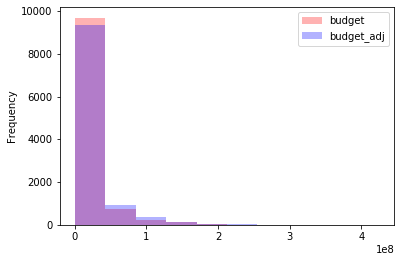

In [9]:
movies_df[['budget','budget_adj']].plot.hist(alpha=0.3, color=['red', 'blue']);

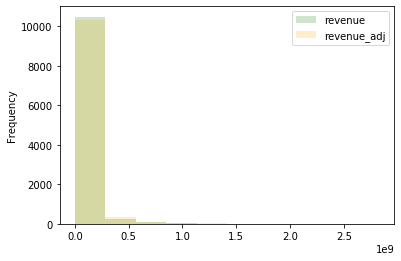

In [10]:
movies_df[['revenue','revenue_adj']].plot.hist(alpha=0.2, color=['green', 'orange']);

In [11]:
budget_revenue_movies_df = movies_df.query('budget == 0 | revenue == 0 | budget_adj < 0.1 | revenue_adj < 0.1')
budget_revenue_movies_df[['budget', 'revenue', 'budget_adj', 'revenue_adj']]

,budget,revenue,budget_adj,revenue_adj
30,0,29355203,0.000000e+00,2.700677e+07
36,0,22354572,0.000000e+00,2.056620e+07
48,30000000,0,2.759999e+07,0.000000e+00
67,20000000,0,1.839999e+07,0.000000e+00
72,0,45895,0.000000e+00,4.222338e+04
...,...,...,...,...
10861,0,0,0.000000e+00,0.000000e+00
10862,0,0,0.000000e+00,0.000000e+00
10863,0,0,0.000000e+00,0.000000e+00
10864,0,0,0.000000e+00,0.000000e+00


In [12]:
len(budget_revenue_movies_df.query('budget==0 & budget_adj<0.1'))

5696

In [13]:
len(budget_revenue_movies_df.query('revenue==0 & revenue_adj<0.1'))

6016

In [14]:
budget_revenue_movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


In [15]:
del budget_revenue_movies_df

Looking at the data set, it appears that information on 'budget', 'revenue', 'budget_adj' and 'revenue_adj' is missing for more than half of the samples in the set.

### Data Cleaning

Duplicate values can be excluded.

In [16]:
movies_df.drop_duplicates(inplace=True)
movies_df.duplicated().sum()

0

Columns with NaN or 0 values, except "genres", were not used in this analysis, so they did not need to be filled out. Most of the columns that will not be used and are not relevant have been dropped.

In [17]:
extracted_columns = ['cast', 'homepage', 'director', 'tagline', 'keywords', 
                     'overview', 'production_companies', 'release_date', 
                     'budget', 'revenue', 'budget_adj', 'revenue_adj']
movies_df.drop(columns = extracted_columns, inplace = True)
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [18]:
movies_df.isnull().any()

id                False
imdb_id            True
popularity        False
original_title    False
runtime           False
genres             True
vote_count        False
vote_average      False
release_year      False
dtype: bool

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which genres of films have been most produced in recent years?

The "movies_recent_years_df" dataframe will contain data from the last 5 years, that is, from 2010 to 2015.

In [19]:
movies_recent_years_df = movies_df.query('release_year >= 2010')

In [20]:
len(movies_recent_years_df)

3605

The "genres_recent_years_df" dataframe will only contain information from the genres of films from the last 5 years, that is, from 2010 to 2015.

In [21]:
genres_recent_years_df = movies_recent_years_df["genres"].str.get_dummies('|')

In [22]:
len(genres_recent_years_df)

3605

Genre names should be processed to avoid possible errors.

In [23]:
#Converting indexes to lowercase and replacing spaces with underscores
indexes = genres_recent_years_df.columns.str
indexes = indexes.lower()
genres_recent_years_df.columns = indexes.str.replace(' ', '_')

genres_recent_years_df.columns

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'foreign', 'history', 'horror', 'music',
       'mystery', 'romance', 'science_fiction', 'tv_movie', 'thriller', 'war',
       'western'],
      dtype='object')

The variable "genres_recent_years" will be used for counting films by genres.

In [24]:
genres_recent_years_serie = genres_recent_years_df.sum().sort_values(ascending=False)

In [25]:
genres_recent_years_serie

drama              1453
comedy             1039
thriller            965
action              678
horror              592
romance             445
adventure           374
science_fiction     364
crime               339
documentary         325
family              304
animation           253
fantasy             232
mystery             219
music               140
history              79
tv_movie             76
war                  65
foreign              33
western              28
dtype: int64

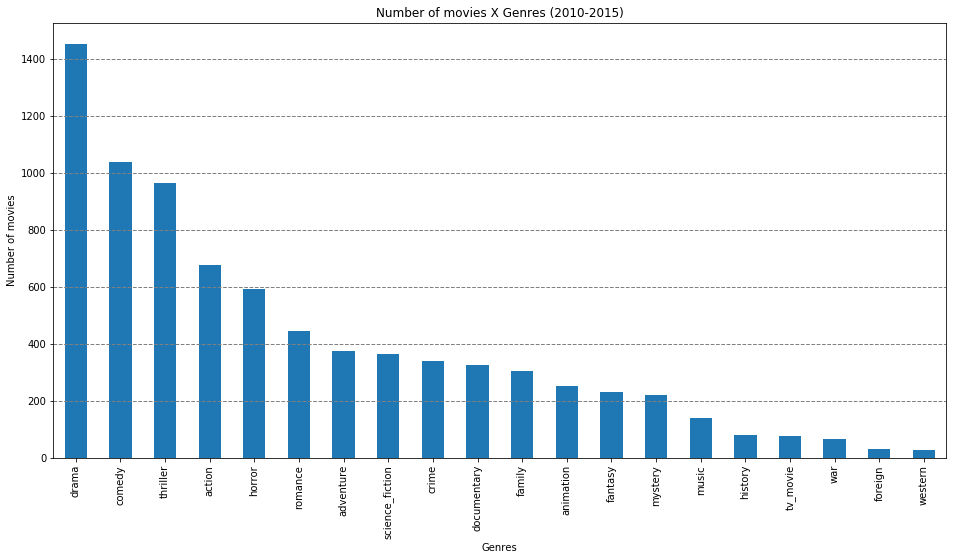

In [26]:
genres_recent_years_serie.plot(
    kind='bar', 
    title='Number of movies X Genres (2010-2015)',
    figsize=(16,8));
plt.gca().yaxis.grid(True, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.show()

Thus, the decreasing order of the number of films in the period from 2010 to 2015 was shown.

### Research Question 2 - What is the most popular genre in the last five years?

To answer this question, the two dataframes for the past few years that were previously created will be reused to create a new dataframe with all the necessary information.

In [27]:
movies_genres_recent_years_df = movies_recent_years_df.merge(genres_recent_years_df,left_index=True, right_index=True)
movies_genres_recent_years_df.head()

,id,imdb_id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,action,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
0,135397,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,0,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
pGenre = lambda x: movies_genres_recent_years_df.query('1=={}'.format(x))['popularity'].mean()
pGenre

<function __main__.<lambda>(x)>

In [29]:
genres_recent_years = movies_genres_recent_years_df.query('release_year >= 2010')
genres_recent_years.head()

,id,imdb_id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,action,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
0,135397,tt0369610,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,0,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
genres_recent_years_serie.index

Index(['drama', 'comedy', 'thriller', 'action', 'horror', 'romance',
       'adventure', 'science_fiction', 'crime', 'documentary', 'family',
       'animation', 'fantasy', 'mystery', 'music', 'history', 'tv_movie',
       'war', 'foreign', 'western'],
      dtype='object')

In [31]:
genres_recent_years_serie.index.values

array(['drama', 'comedy', 'thriller', 'action', 'horror', 'romance',
       'adventure', 'science_fiction', 'crime', 'documentary', 'family',
       'animation', 'fantasy', 'mystery', 'music', 'history', 'tv_movie',
       'war', 'foreign', 'western'], dtype=object)

In [32]:
indexes = genres_recent_years_serie.index.values;
pGValues = np.array([pGenre(i) for i in indexes])
popularity_genres_serie = pd.Series(pGValues, index = indexes)

In [33]:
popularity_genres_serie = popularity_genres_serie.sort_values(ascending=False)
popularity_genres_serie

adventure          1.864340
science_fiction    1.520329
western            1.425661
action             1.347721
fantasy            1.304709
war                1.006723
crime              0.986525
family             0.947087
animation          0.920306
thriller           0.910368
mystery            0.888042
history            0.731153
drama              0.721813
comedy             0.708987
romance            0.681162
music              0.500395
horror             0.471589
tv_movie           0.287699
documentary        0.175212
foreign            0.151135
dtype: float64

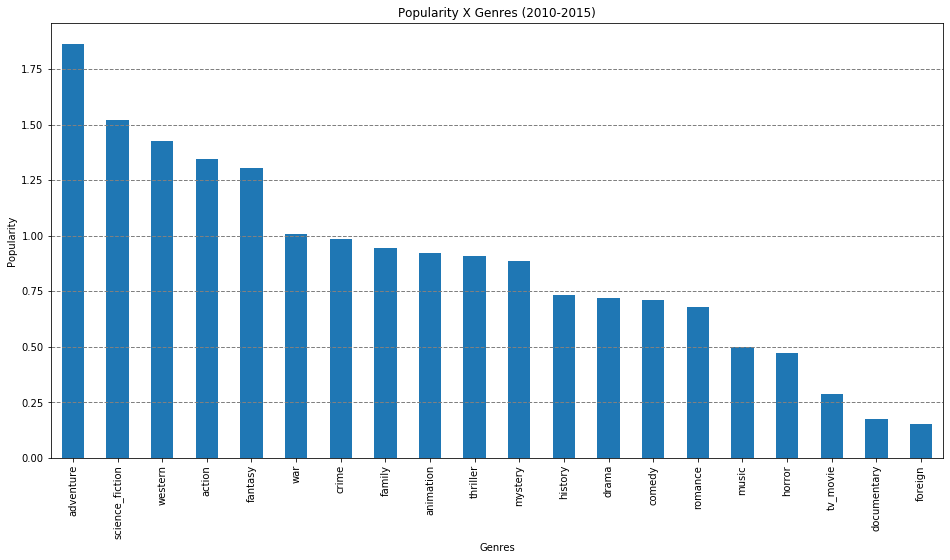

In [34]:
popularity_genres_serie.plot(
    kind='bar', 
    title='Popularity X Genres (2010-2015)',
    figsize=(16,8));
plt.gca().yaxis.grid(True, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.show()

Thus, the order of the most popular film genres from 2010 to 2015 was displayed.

### Research Question 3 - How does the amount of votes relate to the average vote and popularity of films?

For that question, the dataframe used will not be restricted to the last few years. The possible relations between the popularities and the measures referring to votes will be verified through statistical measures and graphs.

In [35]:
movies_df[['popularity','vote_count', 'vote_average']].describe()

,popularity,vote_count,vote_average
count,10865.000000,10865.000000,10865.000000
mean,0.646446,217.399632,5.975012
std,1.000231,575.644627,0.935138
min,0.000065,10.000000,1.500000
25%,0.207575,17.000000,5.400000
50%,0.383831,38.000000,6.000000
75%,0.713857,146.000000,6.600000
max,32.985763,9767.000000,9.200000


In [36]:
movies_df[['popularity','vote_count', 'vote_average']].corr()

,popularity,vote_count,vote_average
popularity,1.000000,0.800828,0.209517
vote_count,0.800828,1.000000,0.253818
vote_average,0.209517,0.253818,1.000000


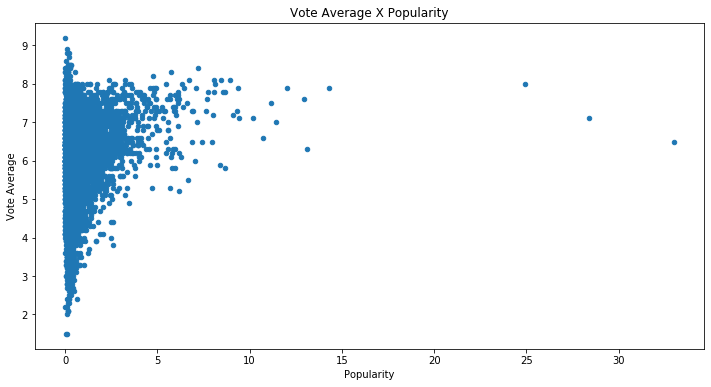

In [37]:
movies_df.plot(
    kind='scatter', 
    title='Vote Average X Popularity', 
    x='popularity', 
    y='vote_average',
    figsize=(12,6));
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

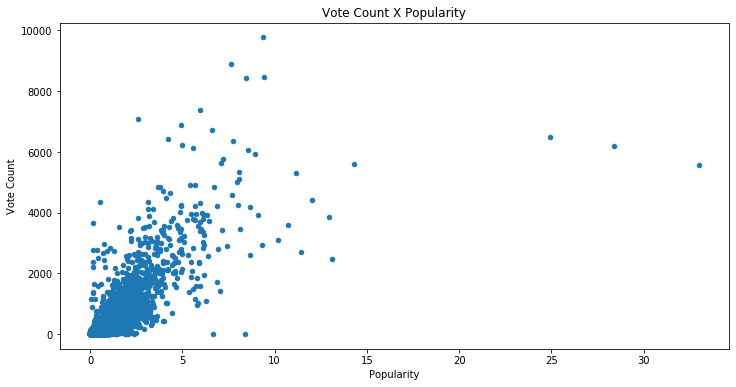

In [38]:
movies_df.plot(
    kind='scatter', 
    x='popularity',
    y='vote_count',
    title='Vote Count X Popularity',
    figsize=(12,6));
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()

The 'popularity' of the film to be strongly related to 'vote_count', but frankly with 'vote_average'.

<a id='conclusions'></a>
## Conclusions
<p>
    The findings made are preliminary, since only descriptive statistics were used, instead of inferential statistics and Machine Learning. Thus, no prediction was made, but only conclusions from observations.
</p>
<p>
    The first two questions were analyzed only for the period from 2010 to 2015. For that period, the genre present in the largest number of films was Drama, followed by Comedy and Thriller. Still for this period, the most popular film genre was Adventure, followed by Science Fiction and Western. Despite its popularity, Adventure is less than a third the number of Drama films. And Drama features half the popularity of the Adventure genre.
</p>
<p>
    The most popular films seem to have the most votes. The greater number of votes does not imply that the votes will be of high grade. The popularity, even though it is high, does not imply that the votes are of a certain value.
</p>

### Limitations
<p>
    The "TMBD Movies dataset" was used for analyzing movie information. The analysis is limited to only the provided dataset. 
</p>
<p>
    Looking at the dataset, it is concluded that several information from 'budget', 'revenue', 'budget_adj' and 'revenue_adj' are missing, and therefore, the conclusions that could be drawn using these columns would have lower reliability than expected of a set of approximately 10,000 films.
</p>
<p>
    As for the fields that have null values, or NaN itself, only "homepage" has a considerably high amount. Although the numeric fields, in this set, are filled with a value of 0 to represent absence of value.
</p>

### References

<ol>
    <li>Investigate a Dataset: Project Details, <b>Udacity</b>. <a href='https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c785f82a-bb1d-471e-91a1-3ddb0851db3d/modules/aaf8503f-e9ac-404b-b81b-82ca77ce7461/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/54201485780923'>https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c785f82a-bb1d-471e-91a1-3ddb0851db3d/modules/aaf8503f-e9ac-404b-b81b-82ca77ce7461/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/54201485780923</a>, accessed on 05/14/2020</li>
    <li>Quarentena Dados - Aula 1: Python, Pandas e Colab; <b>Alura e Caelum</b>. <a href='https://www.alura.com.br/quarentenadados/aula01-sua-primeira-analise-de-dados'>https://www.alura.com.br/quarentenadados/aula01-sua-primeira-analise-de-dados</a>, accessed on 05/14/2020</li>
    <li>Quarentena Dados - Aula 2: Médias, medianas e visualização de dados; <b>Alura e Caelum</b> <a href='https://www.alura.com.br/quarentenadados/aula02-visualizacao-de-dados'>https://www.alura.com.br/quarentenadados/aula02-visualizacao-de-dados</a>, accessed on 05/14/2020</li>
</ol>